# <center> Лабораторная работа 2
## <center> Задача классификации. Последовательная нейронная сеть
### _Автор: Стецук Максим 1гр.2п.гр._

In [25]:
# Игнорирование предупреждений
import warnings
warnings.filterwarnings('ignore')

In [26]:
# Последовательная модель НС
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization

# Утилиты для to_categorical()
from tensorflow.keras import utils

# Алгоритмы оптимизации для обучения модели
from tensorflow.keras.optimizers import Adam

# Библиотека для работы с массивами
import numpy as np

# Отрисовка графиков
import matplotlib.pyplot as plt

# Разделение данных на выборки
from sklearn.model_selection import train_test_split

# Для загрузки датасета
from sklearn.datasets import load_wine

# Отрисовка изображений в ноутбуке, а не в консоли или файле
%matplotlib inline

### <center> _Подготовка данных_

In [27]:
# Загрузка набора данных о винах
x_data = load_wine()['data']              
# Загрузка классов вин
y_data = load_wine()['target']

print('Размерность x_data -', x_data.shape)
print('Размерность y_data -', y_data.shape)
print('--------------')

# Вывод примера данных
print('Данные по первому вину:',x_data[0])
print('Класс вина:',y_data[0])

Размерность x_data - (178, 13)
Размерность y_data - (178,)
--------------
Данные по первому вину: [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
Класс вина: 0


In [28]:
# Перевод в one hot encoding
y_data = utils.to_categorical(y_data, 3)

# Разбиение наборов на общую и тестовую выборки
x_all, x_test, y_all, y_test = train_test_split(x_data,
                                                y_data,
                                                test_size=0.1,
                                                shuffle=True,
                                                random_state = 6)

# Разбиение общей выборки на обучающую и проверочную
x_train, x_val, y_train, y_val = train_test_split(x_all,
                                                  y_all,
                                                  test_size=0.1,
                                                  shuffle=True,
                                                  random_state = 6)

print(x_train.shape)
print(y_train.shape)
print('-----')
print(x_val.shape)
print(y_val.shape)
print('-----')
print(x_test.shape)
print(y_test.shape)

(144, 13)
(144, 3)
-----
(16, 13)
(16, 3)
-----
(18, 13)
(18, 3)


### <center> Разработка последовательной нейронной сети

In [29]:
 # Последовательная модель нейронной сети
model = Sequential()

model.add(Dense(100, input_dim=x_train.shape[1], activation='leaky_relu'))
model.add(Dense(50, activation='leaky_relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='leaky_relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 100)            │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,993 (27.32 KB)

 Trainable params: 6,993 (27.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3986 - loss: 62.5269 - val_accuracy: 0.2500 - val_loss: 13.3599
Epoch 2/3000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3681 - loss: 16.6362 - val_accuracy: 0.5000 - val_loss: 3.8811
Epoch 3/3000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4669 - loss: 9.0704 - val_accuracy: 0.5000 - val_loss: 3.8768
Epoch 4/3000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4696 - loss: 6.2192 - val_accuracy: 0.4375 - val_loss: 5.9597
Epoch 5/3000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4844 - loss: 8.0028 - val_accuracy: 0.5625 - val_loss: 2.2729
Epoch 6/3000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4511 - loss: 8.3637 - val_accuracy: 0.5625 - val_loss: 3.0910
Epoch 7/3000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5033 - loss: 6.8814 - val_accuracy: 0.5000 - val_loss: 3.7640
Epoch 8/3000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4226 - loss: 7.6210 - val_accuracy: 0.6250 - val_l

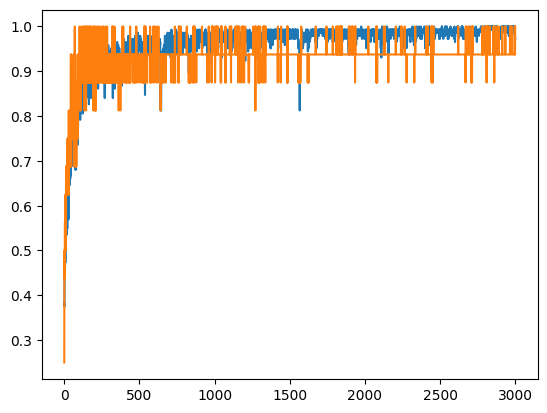

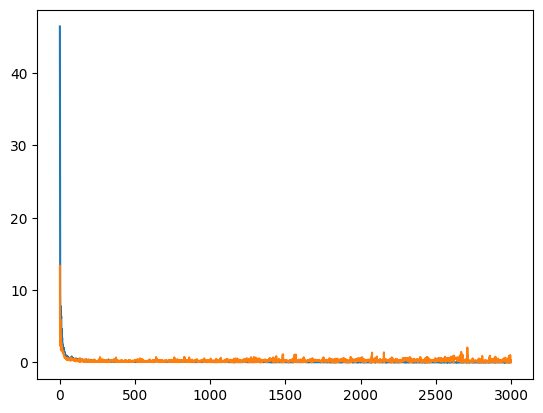

In [30]:
# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'],
              loss='categorical_crossentropy')

# Обучение модели
history = model.fit(x_train,
                    y_train,
                    validation_data=(x_val,
                                     y_val),
                    epochs = 3000,
                    batch_size = 32)

# Вывод графика обучения (точность)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

# Вывод графика обучения (доля ошибки)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

### <center> _Оценка точности классификации на тестовой выборке_

In [31]:
model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0476


[0.04763776436448097, 1.0]

In [32]:
# Предсказание модели
predictions = np.argmax(model.predict(x_test), axis=1)
y_test_nums = np.argmax(y_test, axis=1)

# Вывод результатов тестирования
for i in range(len(x_test)):
    print(f'Предсказано - {predictions[i]}, было {y_test_nums[i]}, {predictions[i] == y_test_nums[i]}')
print(f'\n Процент верных предсказаний - {(predictions == y_test_nums).mean()*100} %')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Предсказано - 0, было 0, True
Предсказано - 1, было 1, True
Предсказано - 1, было 1, True
Предсказано - 1, было 1, True
Предсказано - 0, было 0, True
Предсказано - 0, было 0, True
Предсказано - 1, было 1, True
Предсказано - 1, было 1, True
Предсказано - 1, было 1, True
Предсказано - 0, было 0, True
Предсказано - 0, было 0, True
Предсказано - 1, было 1, True
Предсказано - 2, было 2, True
Предсказано - 0, было 0, True
Предсказано - 1, было 1, True
Предсказано - 0, было 0, True
Предсказано - 0, было 0, True
Предсказано - 0, было 0, True

 Процент верных предсказаний - 100.0 %


Таким образом была разработана последовательная модель нейронной сети, которая после проведения серии экспериментов достигла точности классификации на тестовой выборке выше 94% (100%).